# 2D Softmax Position-Velocity Model

Note the *2D* part refers to the ball is being shot from a point to different points in the goal, **not** that the input features are 2D. In fact, the input features are 4D `[x, y, dx, dy]` vectors

### Plotting

In [18]:
colormap = np.array([c for c in np.linspace(0, 1, 10)])

### Load Data

In [19]:
%store -r one_many_short

sideways = one_many_short.T

X, Y = np.array(sideways[:4]).astype(float), np.array(sideways.ix[4, :]).astype(int)

### Train

In [20]:
from softmax import Softmax

sm = Softmax(X, Y, C=10, learning_rate=.1, regularizer=.001, gradient_checking=False, inspect=True)

def states(iters):
    for _ in range(iters):
        sm.learn()
        yield sm.info
        
states = list(states(50000))

### Plot Losses

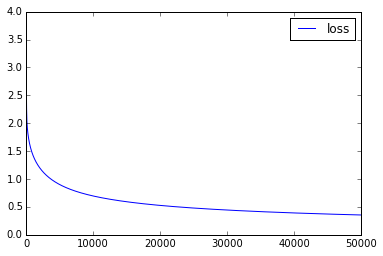

In [21]:
def loss_averages():
    for state in states:
        yield state.loss.mean()
        
loss_avgs = list(loss_averages())

pd.DataFrame(loss_avgs, columns=['loss']).plot()

### Visualize

Notice the plots are linear because of the following recurrence relation:

$$v_t = x_{t+1} - x_t$$

This formula follows by definition of $x_t$:

$$x_t = x_{t-1} + v_{t-1}$$

Intuitively, as the difference between $x$ points gets smaller, the difference between $y$ points get smaller **by the same amount**

/home/ebanner/.anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:23: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


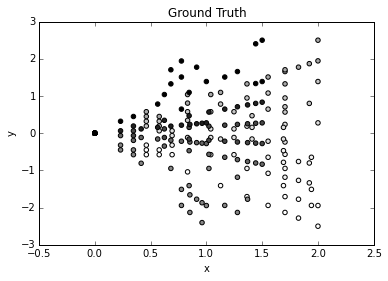

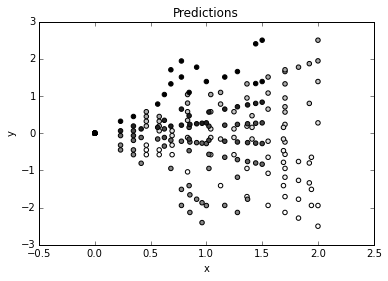

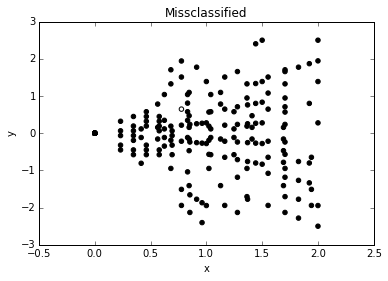

In [22]:
from ipywidgets import interact, fixed

@interact(X=fixed(X), Y=fixed(Y), one_many_short=fixed(one_many_short), view_index=(0, len(states)-1), states=fixed(states))
def plot(X, Y, one_many_short, view_index, states):
    """View decision boundary over time
    
    We have the state of the model (i.e. its parameters) after every time step.
    We want to see how the model learns over time. Hence create a one-off instance
    of a softmax with its old parameters and ask it to make a bunch of predictions!
    """
    s = states[view_index]
    sm = Softmax(X=X, ys_train=Y, C=10, W=s.W, b=s.b)
    
    # Plot the gold standard in a plot right next to it
    one_many_short.plot(kind='scatter', x='x', y='y', c=colormap[one_many_short['label']], title='Ground Truth')

    # Predictions
    one_many_short['predictions'] = sm.predict(X)
    one_many_short.plot(kind='scatter', x='x', y='y', c=colormap[one_many_short['predictions']], title='Predictions')
    
    # Misclassified examples
    one_many_short['correct'] = one_many_short['label'] == one_many_short['predictions']
    one_many_short.plot(kind='scatter', x='x', y='y', c=colormap[one_many_short['correct']], title='Missclassified')

In [23]:
one_many_short['correct'].sum() / len(one_many_short)

0.96999999999999997

In [24]:
one_many_short

x         y        dx        dy  label  predictions correct
label                                                                        
0     200  0.000000  0.000000  0.462010 -0.577512      0            0    True
      201  0.462010 -0.577512  0.369608 -0.462010      0            0    True
      202  0.831618 -1.039522  0.295686 -0.369608      0            0    True
      203  1.127304 -1.409130  0.236549 -0.295686      0            0    True
      204  1.363853 -1.704817  0.189239 -0.236549      0            0    True
      205  1.553093 -1.941366  0.151391 -0.189239      0            0    True
      206  1.704484 -2.130605  0.121113 -0.151391      0            0    True
      207  1.825597 -2.281996  0.096891 -0.121113      0            0    True
      209  2.000000 -2.500000  0.062010 -0.077512      0            0    True
      210  0.000000  0.000000  0.462010 -0.449176      0            0    True
      211  0.462010 -0.449176  0.369608 -0.359341      0            0    True
      217  1.825597 -1.774886  0.096891 -0.094199      0            0    True
      219  2.000000 -1.944444  0.062010 -0.060287      0            0    True
      301  0.577512 -0.577512  0.462010 -0.462010      0            0    True
      304  1.704817 -1.704817  0.236549 -0.236549      0            0    True
      305  1.941366 -1.941366  0.189239 -0.189239      0            0    True
      307  0.577512 -0.449176  0.462010 -0.359341      0            0    True
      311  1.941366 -1.509951  0.189239 -0.147186      0            0    True
      361  0.693015 -0.577512  0.554412 -0.462010      0            0    True
      363  1.690956 -1.409130  0.354824 -0.295686      0            0    True
1     221  0.462010 -0.320840  0.369608 -0.256672      1            1    True
      224  1.363853 -0.947120  0.189239 -0.131416      1            1    True
      225  1.553093 -1.078536  0.151391 -0.105133      1            1    True
      226  1.704484 -1.183669  0.121113 -0.084106      1            1    True
      227  1.825597 -1.267776  0.096891 -0.067285      1            1    True
      228  1.922488 -1.335061  0.077512 -0.053828      1            1    True
      230  0.000000  0.000000  0.462010 -0.192504      1            1    True
      235  1.553093 -0.647122  0.151391 -0.063080      1            1    True
      237  1.825597 -0.760665  0.096891 -0.040371      1            1    True
      238  1.922488 -0.801036  0.077512 -0.032297      1            1    True
...             ...       ...       ...       ...    ...          ...     ...
8     160  0.000000  0.000000  0.346507  0.192504      8            8    True
      161  0.346507  0.192504  0.277206  0.154003      8            8    True
      162  0.623713  0.346507  0.221765  0.123203      8            8    True
      163  0.845478  0.469710  0.177412  0.098562      8            8    True
      164  1.022890  0.568272  0.141929  0.078850      8            8    True
      165  1.164819  0.647122  0.113544  0.063080      8            8    True
      166  1.278363  0.710202  0.090835  0.050464      8            8    True
      167  1.369198  0.760665  0.072668  0.040371      8            8    True
      168  1.441866  0.801036  0.058134  0.032297      8            8    True
      169  1.500000  0.833333  0.046507  0.025837      8            8    True
9     65   0.776546  0.647122  0.075696  0.063080      9            8   False
      70   0.000000  0.000000  0.231005  0.320840      9            9    True
      71   0.231005  0.320840  0.184804  0.256672      9            9    True
      73   0.563652  0.782850  0.118275  0.164270      9            9    True
      79   1.000000  1.388889  0.031005  0.043062      9            9    True
      84   0.681927  1.325968  0.094620  0.183983      9            9    True
      85   0.776546  1.509951  0.075696  0.147186      9            9    True
      87   0.912799  1.774886  0.048445  0.094199      9            9    True
      90   0.000000  0.000000  0.231005 